In [1]:
import gym

import numpy as np
import time

In [2]:
env = gym.make('FrozenLake-v1')  # we are going to use the FrozenLake enviornment

In [3]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [4]:
env.reset()  # reset enviornment to default state

0

In [5]:
action = env.action_space.sample()  # get a random action 

In [6]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [7]:
env.render()   # render the GUI for the enviornment 

  (Up)
SFFF
FHFH
FFFH
HFFG


## Building the Q-Table

In [11]:
env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [12]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Constants

In [15]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False

epsilon = 0.9  # start with a 90% chance of picking a random action

## Q-Learning

In [16]:
rewards = []
for episode in range(EPISODES):

    state = env.reset()
    for _ in range(MAX_STEPS):
    
        if RENDER:
            env.render()

        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, done, _ = env.step(action)

        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if done: 
            rewards.append(reward)
            epsilon -= 0.001
            break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[2.84422470e-01 2.04810752e-02 1.48011769e-02 2.04728552e-02]
 [5.23450574e-03 5.48457191e-03 6.54601588e-03 3.48509589e-01]
 [3.32431062e-01 2.97061214e-03 2.20407928e-03 6.28362856e-03]
 [3.26639844e-03 2.24093993e-03 2.70098847e-03 6.35234799e-03]
 [3.52538054e-01 1.57654162e-02 8.35434067e-03 8.78300646e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.22745363e-01 3.17798451e-05 9.09610073e-06 1.61284865e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.27059298e-03 3.61228316e-03 1.06838801e-02 4.07663800e-01]
 [4.03875420e-03 6.96909597e-01 1.88608107e-03 5.98574532e-03]
 [8.11183227e-01 3.94971710e-04 3.60151607e-04 3.13596798e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.03214370e-02 2.42172574e-02 8.99107246e-01 2.28478643e-02]
 [8.04989246e-02 9.73294680e-01 6.14813347e-02 1.28839464e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

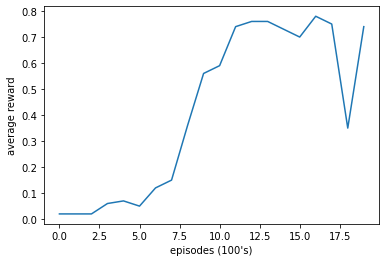

In [17]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()